# Web Traffic Forecasting - Part 3: Deep Learning - LSTM #

### LSTM for web traffic prediction
In this note book, we provide 2 versions of implementation. The first part is for multiple pages, and the corresponding data were put into a matrix. The second part is for one page, and the corresponding data were put into a vector(array).

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score

In [ ]:
import datetime
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Please change the path of this data file into the correct path of your own google drive
df = pd.read_csv('/content/drive/MyDrive/Decision_analytics_project/data/train_data1000.csv')

In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,Agatha_Christie's_Poirot_en.wikipedia.org_all-...,817.0,757.0,888.0,906.0,1125.0,913.0,1102.0,977.0,852.0,...,867.0,952.0,1223.0,1057.0,992.0,1018.0,1199.0,1035.0,1002.0,1184.0
1,Anglicanism_en.wikipedia.org_all-access_all-ag...,1566.0,1899.0,1431.0,1440.0,1865.0,1654.0,1812.0,1447.0,1480.0,...,1715.0,1622.0,1961.0,2212.0,2283.0,2313.0,3084.0,1793.0,1454.0,1847.0
2,English_language_en.wikipedia.org_mobile-web_a...,4365.0,4360.0,4204.0,4299.0,4637.0,4618.0,4418.0,4346.0,4399.0,...,4049.0,4283.0,4654.0,4845.0,4930.0,4775.0,4781.0,4389.0,4481.0,4805.0
3,Borderline_personality_disorder_en.wikipedia.o...,5628.0,4853.0,4840.0,4909.0,4970.0,5071.0,5148.0,5215.0,4898.0,...,4350.0,4341.0,4262.0,4474.0,4430.0,4353.0,4383.0,4134.0,4038.0,4312.0
4,Tramadol_en.wikipedia.org_mobile-web_all-agents,6451.0,6583.0,6267.0,5995.0,5917.0,6385.0,6747.0,6734.0,6837.0,...,5387.0,5101.0,4966.0,4399.0,4223.0,4253.0,5315.0,5194.0,4802.0,4459.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Nationwide_opinion_polling_for_the_United_Stat...,2055.0,1968.0,1729.0,1525.0,1539.0,1695.0,1888.0,1730.0,2004.0,...,191.0,118.0,168.0,186.0,148.0,97.0,95.0,90.0,82.0,77.0
996,DC_Extended_Universe_en.wikipedia.org_all-acce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6382.0,7023.0,7696.0,7638.0,7464.0,6707.0,7806.0,6617.0,6866.0,NaN
997,List_of_South_Park_episodes_en.wikipedia.org_d...,4052.0,3863.0,3281.0,3655.0,4074.0,4473.0,5689.0,6790.0,6173.0,...,2731.0,3009.0,3543.0,3958.0,3556.0,3829.0,4137.0,4057.0,3678.0,4411.0
998,Glory_(Britney_Spears_album)_en.wikipedia.org_...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,717.0,830.0,811.0,780.0,716.0,680.0,677.0,619.0,663.0,776.0


## 1. Multiple Page Version

## Select pages to do experiment

In [ ]:
selected_pages = ['Portal:Current_events_en.wikipedia.org_mobile-web_all-agents', 
                  'Lisa_Ann_en.wikipedia.org_mobile-web_all-agents',
                  'Representational_state_transfer_en.wikipedia.org_desktop_all-agents',
                  'Mary_I_of_England_en.wikipedia.org_mobile-web_all-agents',
                  'List_of_country_calling_codes_en.wikipedia.org_desktop_all-agents'
                  ]

## Data quality check and scaling

In [ ]:
view_df = df[df['Page'].isin(selected_pages)].set_index('Page')

In [ ]:
view_df = view_df.transpose()

In [ ]:
view_df

Page,Portal:Current_events_en.wikipedia.org_mobile-web_all-agents,Mary_I_of_England_en.wikipedia.org_mobile-web_all-agents,List_of_country_calling_codes_en.wikipedia.org_desktop_all-agents,Lisa_Ann_en.wikipedia.org_mobile-web_all-agents,Representational_state_transfer_en.wikipedia.org_desktop_all-agents
2015-07-01,3004.0,3268.0,5470.0,6297.0,5481.0
2015-07-02,2769.0,3063.0,5352.0,5902.0,5236.0
2015-07-03,2876.0,2918.0,4263.0,5804.0,3678.0
2015-07-04,2829.0,3043.0,2413.0,5711.0,1584.0
2015-07-05,2964.0,3424.0,2261.0,5670.0,1823.0
...,...,...,...,...,...
2017-09-06,6503.0,5235.0,4276.0,3001.0,5244.0
2017-09-07,6460.0,5206.0,4460.0,2683.0,5150.0
2017-09-08,6553.0,5897.0,3779.0,2559.0,4370.0
2017-09-09,6089.0,5370.0,1817.0,2951.0,1912.0


In [ ]:
view_df.isnull().sum()

Page
Portal:Current_events_en.wikipedia.org_mobile-web_all-agents           0
Mary_I_of_England_en.wikipedia.org_mobile-web_all-agents               0
List_of_country_calling_codes_en.wikipedia.org_desktop_all-agents      0
Lisa_Ann_en.wikipedia.org_mobile-web_all-agents                        0
Representational_state_transfer_en.wikipedia.org_desktop_all-agents    0
dtype: int64

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
scaled_view_df = scaler.fit_transform(view_df)

## Train test split and feature engineering
- We used first 80% percent of data as training data, according to chronologinal order.

## Build 60-day rolling window for train data

In [ ]:
views = view_df
values = views.values
training_data_len = math.ceil(len(values)* 0.8) #nearest round interger

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values)
train_data = scaled_data[0: training_data_len, :]

X_train = []
Y_train = []

# rolling of window 60
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, :])
    Y_train.append(train_data[i, :])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
X_train.shape

(583, 60, 5)

In [ ]:
Y_train.shape

(380, 5)

In [ ]:
Y_train

array([[0.0952381 , 0.19191919, 0.18115942, 0.1547619 , 0.49462366],
       [0.54761905, 0.26262626, 0.18115942, 0.13095238, 0.71505376],
       [0.4047619 , 0.21212121, 0.26811594, 0.10714286, 0.5483871 ],
       ...,
       [0.20238095, 0.07070707, 0.10869565, 0.85714286, 0.0483871 ],
       [0.27380952, 0.12121212, 0.15217391, 0.58333333, 0.08064516],
       [0.29761905, 0.25252525, 0.18115942, 0.60714286, 0.25268817]])

## Build 60-day rolling window for test data

In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
X_test = []
Y_test = scaled_data[training_data_len:]

for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, :])

X_test = np.array(X_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
random.seed(0)

## Train n models for n pages(n=5) and predict result on test dataset

In [ ]:
prediction_list = []
models = []
rmse_metric = []
r_sqaured_metric = []
for i in range(len(selected_pages)):
  x_train = X_train[:,:,i]
  y_train = Y_train[:,i]
  x_test = X_test[:,:,i]
  y_test = Y_test[:,i]

  # neural network model
  model = keras.Sequential()
  model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
  model.add(layers.LSTM(100, return_sequences=False))
  model.add(layers.Dense(25))
  model.add(layers.Dense(1))
  # model.summary()
  model.compile(optimizer='adam', loss='mean_squared_error')
  model.fit(x_train, y_train, batch_size= 1, epochs=3)
  models.append(model)
  predictions = model.predict(x_test)
  # predictions = scaler.inverse_transform(predictions)
  prediction_list.append(predictions)
  rmse = np.sqrt(np.mean(predictions - y_test)**2)
  R2 = r2_score(y_test, predictions)
  rmse_metric.append(rmse)
  r_sqaured_metric.append(R2)
  print(f'The RMSE of page {i} is:', rmse)
  print(f'The R-sqaured of page {i} is:', R2)

Epoch 1/3
583/583 [==============================] - 24s 36ms/step - loss: 0.0063
Epoch 2/3
583/583 [==============================] - 20s 34ms/step - loss: 0.0051
Epoch 3/3
5/5 [==============================] - 1s 32ms/step
The RMSE of page 0 is: 0.04804235967352008
The R-sqaured of page 0 is: 0.4910393933287468
Epoch 1/3
583/583 [==============================] - 24s 35ms/step - loss: 0.0080
Epoch 2/3
583/583 [==============================] - 20s 35ms/step - loss: 0.0072
Epoch 3/3
5/5 [==============================] - 1s 34ms/step
The RMSE of page 1 is: 0.05246200173475187
The R-sqaured of page 1 is: -0.2073101728871729
Epoch 1/3
583/583 [==============================] - 23s 35ms/step - loss: 0.0493
Epoch 2/3
583/583 [==============================] - 20s 35ms/step - loss: 0.0232
Epoch 3/3
5/5 [==============================] - 1s 32ms/step
The RMSE of page 2 is: 0.0423251141161773
The R-sqaured of page 2 is: 0.515747607485094
Epoch 1/3
583/583 [==============================] - 

In [ ]:
prediction_list = np.array(prediction_list).T.squeeze()

In [ ]:
prediction_list.shape

(110, 5)

In [ ]:
scaled_data.shape

(550, 5)

In [ ]:
prediction_list = scaler.inverse_transform(prediction_list)

## Visualize the predicted result and compare with ground truth

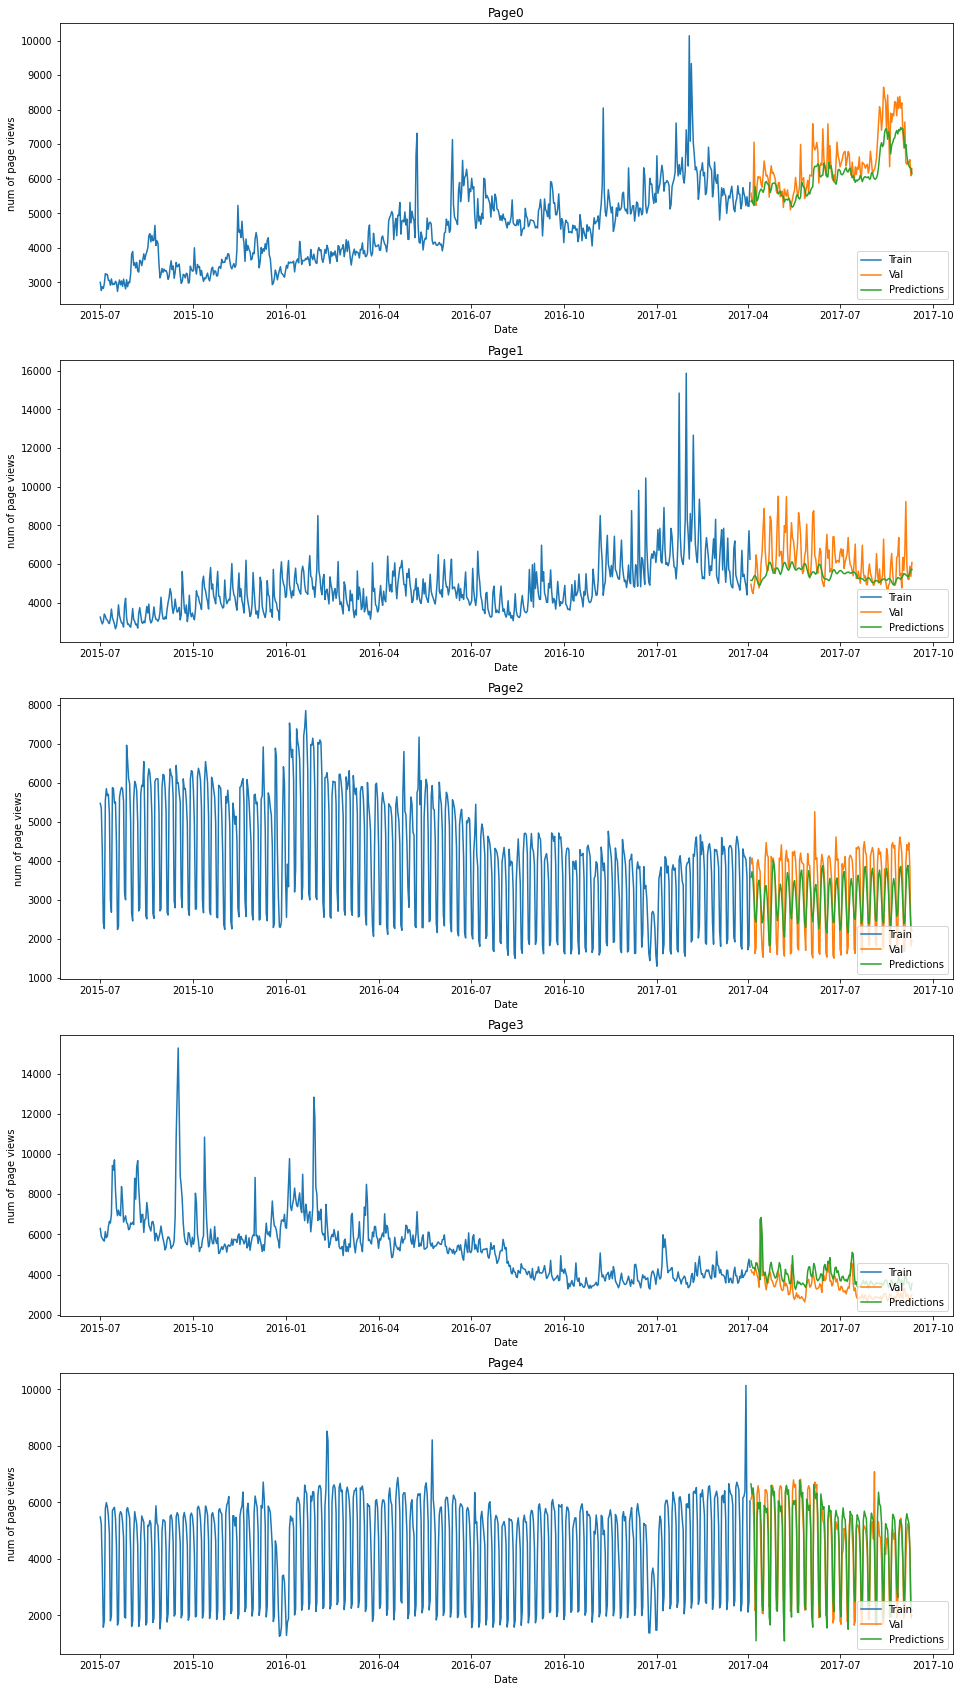

In [ ]:
plt.figure(figsize=(16,30))
for i in range(len(selected_pages)):
  plt.subplot(5, 1, i+1)
  # data = view_df.iloc[:, i]
  data = view_df.filter(items = [view_df.columns[i]])
  data.index = pd.to_datetime(data.index) # convert to data time format for plotting
  train = data[:training_data_len]
  
  predictions = prediction_list[:, i]
  validation = pd.DataFrame()
  validation['val'] = data[training_data_len:]
  validation['Predictions'] = predictions
  # rmse = np.sqrt(np.mean(validation['Predictions'] - validation['val'])**2)
  # plt.plot(xticks= x)
  plt.title(f'Page{i}')
  plt.xlabel('Date')
  plt.ylabel('num of page views')
  
  plt.plot(train)
  plt.plot(validation[['val','Predictions']])
  
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### Save the validation result

In [ ]:
validation_df = view_df.iloc[training_data_len:]

In [ ]:
for i in range(len(selected_pages)):
  validation_df.iloc[:,i] = prediction_list[:, i]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
validation_df.head()

Page,Portal:Current_events_en.wikipedia.org_mobile-web_all-agents,Mary_I_of_England_en.wikipedia.org_mobile-web_all-agents,List_of_country_calling_codes_en.wikipedia.org_desktop_all-agents,Lisa_Ann_en.wikipedia.org_mobile-web_all-agents,Representational_state_transfer_en.wikipedia.org_desktop_all-agents
2017-04-04,5615.853516,6401.792969,4748.675781,4088.297607,7433.259766
2017-04-05,5541.597656,6522.134277,4691.497070,4043.384033,7267.450684
2017-04-06,5406.023438,6681.791016,4234.385254,4010.469238,7452.699707
2017-04-07,5363.215820,6800.374023,3274.986328,4046.607178,6905.313477
2017-04-08,6158.498047,6810.943359,2359.185059,3968.425537,3934.389893
...,...,...,...,...,...
2017-09-06,6602.762207,7054.484375,4764.999023,2836.481934,5963.097656
2017-09-07,6594.033203,7195.430664,4257.843262,2847.783936,5764.771973
2017-09-08,6536.768555,7390.279785,3169.078125,2670.318359,4629.308105
2017-09-09,6529.412109,7549.223633,2090.861572,2593.174805,2534.587891


In [ ]:
validation_df.to_csv('/content/drive/MyDrive/Decision_analytics_project/LSTM_preds.csv')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
for i in range(len(selected_pages)):
  y_pred = prediction_list[:, i]
  y_true = view_df.iloc[:, i][training_data_len:]
  
  R2 = r2_score(y_true, y_pred)
  print(f'R2 of page {i} is:', R2)

R2 of page 0 is: -0.2637227018597885
R2 of page 1 is: -1.6080929029918618
R2 of page 2 is: -0.013137009681620126
R2 of page 3 is: -0.11309973361939996
R2 of page 4 is: -0.04950864366744012


## 2.One page version

In [ ]:
view_df = df[df['Page'] == 'Armor_Holdings_en.wikipedia.org_all-access_all-agents'].transpose()

In [ ]:
view_df

,109860
Page,Armor_Holdings_en.wikipedia.org_all-access_all...
2015-07-01,50.0
2015-07-02,52.0
2015-07-03,40.0
2015-07-04,37.0
...,...
2016-12-27,29.0
2016-12-28,36.0
2016-12-29,47.0
2016-12-30,36.0


In [ ]:
view_df = view_df.drop(index = 'Page')

In [ ]:
view_df = view_df.rename(columns ={109860:'view'})

Text(0, 0.5, 'number of views')

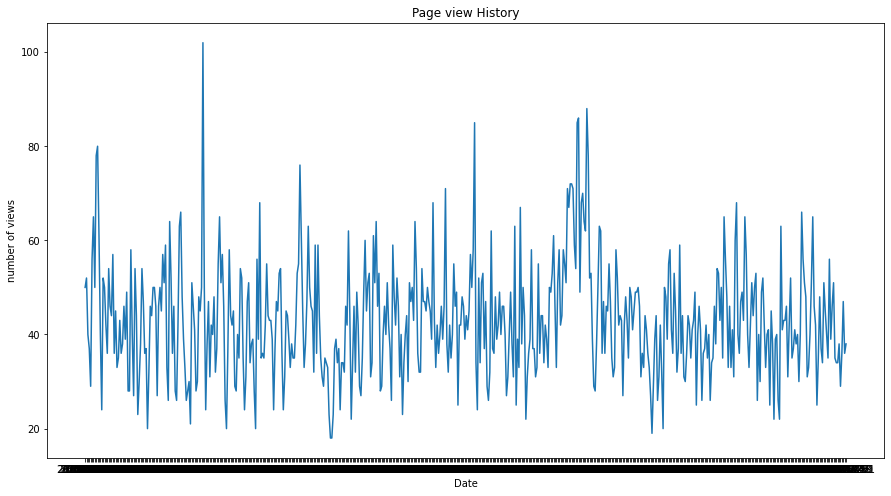

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Page view History')
plt.plot(view_df['view'])
plt.xlabel('Date')
plt.ylabel('number of views')

In [ ]:
len(view_df)

550

In [ ]:
views = view_df['view']
values = views.values
training_data_len = math.ceil(len(values)* 0.8) #nearest round interger

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

# rolling of window 60
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(380, 60, 1)

In [ ]:
y_train.shape

(380,)

In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
380/380 [==============================] - 9s 19ms/step - loss: 0.0239
Epoch 2/3
380/380 [==============================] - 10s 26ms/step - loss: 0.0224
Epoch 3/3
380/380 [==============================] - 8s 20ms/step - loss: 0.0226


In [ ]:

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4/4 [==============================] - 1s 16ms/step


1.8307021401145243

In [ ]:
len(predictions)

110

<ipython-input-28-a82ccbfdad3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


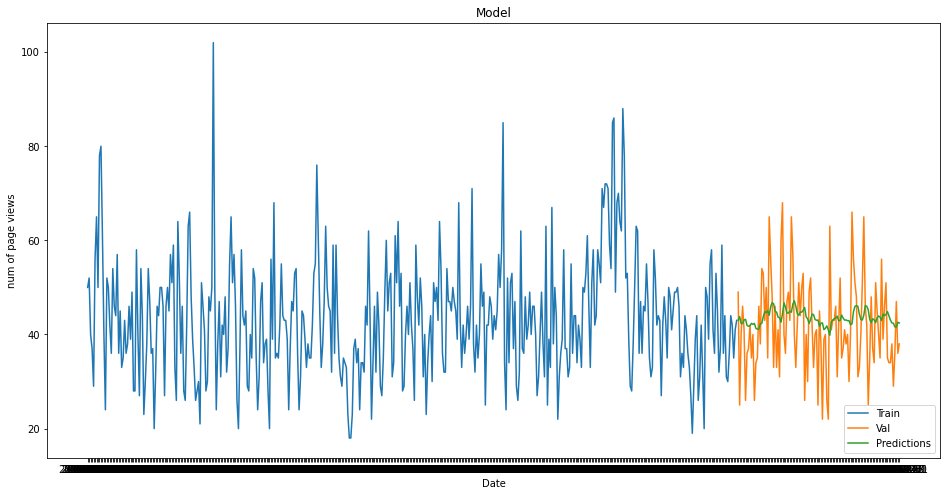

In [ ]:
data = view_df
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('num of page views')
plt.plot(train)
plt.plot(validation[['view', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()